# Email Generator and Sender

This Python script uses OpenAI's GPT-3 to generate email content and sends the generated email using the Gmail SMTP server. It provides a simple way to compose and send emails programmatically.

## How to Use

1. **Set Up Your OpenAI API Key:** Replace the `openai.api_key` variable with your OpenAI API key. Make sure you have OpenAI access before proceeding.

2. **Configure Your Gmail Account:**
   - Use a Gmail account as the sender. If you have two-factor authentication enabled, you may need to create an "App Password" for your Gmail account and use it as the password.
   - Ensure that the "Less secure apps" option is turned on in your Google Account settings (not recommended for production).

3. **Run the Script:** Execute the Python script.

4. **Provide Information:**
   - Enter the email subject when prompted.
   - Enter the sender's name and receiver's name when prompted.
   - The script will use GPT-3 to generate the email content.
   - The email will be sent to the specified receiver's email address.

5. **Email Sent:** You will receive a confirmation message indicating that the email has been sent successfully.

## Dependencies

This script uses the following Python libraries:

- `smtplib`: Used for sending emails through the SMTP server.
- `openai`: Provides access to the GPT-3 API for generating email content.
- `email.mime.multipart` and `email.mime.text`: Used to create the email message.

## Email Generation

The `generate_email_content` function uses GPT-3 to generate the email body. It creates a prompt that includes the receiver's name and the desired email subject and asks GPT-3 to generate the email content. The generated email content is then returned and combined with the sender's name for the signature.

## Email Sending

The `send_email` function sends the email using the Gmail SMTP server. It constructs a MIME email message with the provided subject and body, logs in to your Gmail account, sends the email, and quits the server.

Feel free to modify and extend this script for your specific use case or integrate it into a larger application.

In [1]:
import smtplib
import openai
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

openai.api_key = "Your openai API key" # Replace with Your openai API key

def generate_email_content(subject,sender_name,receiver_name):
    prompt = f"Dear {receiver_name},\n\n"
    prompt += f"Generate an email body for the subject: {subject}\n\n"
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=150
    )
    email_body = response.choices[0].text.strip()
    email_body += f"\n\nBest regards,\n{sender_name}"
    return email_body

def send_email(subject, body, to_email):
    from_email = "sender_email"    # Replace with valid sender email id
    password = "Your app Password" # Replace with valid app password

    # Create a MIME object for the email
    msg = MIMEMultipart()
    msg["From"] = from_email
    msg["To"] = to_email
    msg["Subject"] = subject
    msg.attach(MIMEText(body, "plain"))

    # Connect to Gmail's SMTP server
    server = smtplib.SMTP("smtp.gmail.com", 587)
    server.starttls()

    # Login to your Gmail account
    server.login(from_email, password)

    # Send the email
    server.sendmail(from_email, to_email, msg.as_string())

    # Quit the server
    server.quit()

def main():
    subject = input("Enter the email subject: ")
    to_email = "receiver_email"       # Replace with valid receiver email id
    sender_name = input("Enter sender name: ")
    receiver_name=input("Enter receiver name: ")
    
    while True:
        email_body = generate_email_content(subject,sender_name,receiver_name)
        print(f"\n=========================\n{email_body}")  # for separation of rephrase emails 
        opt=input("Do you want to send email or regenerate  ( Enter send/re): ")
        if opt=="send":
            send_email(subject, email_body, to_email)
            print("Email sent successfully!")
            break
        else:
            continue
        

if __name__ == "__main__":
    main()


Enter the email subject: Applying for internship as a frontend developer in flipkart
Enter sender name: Priya
Enter receiver name: HR Manager Flipkart

Dear HR Manager,

My name is [Your Name] and I am interested in applying for an intern position at Flipkart as a Frontend Developer.

I believe that I have the necessary skills to be successful in this role. I have a Bachelor of Science degree in Computer Science from [University Name], and I have been coding and developing frontend applications for the past [X] years. I also have experience developing with popular frameworks and libraries such as [Frameworks].

I understand that one of the key responsibilities for this role is to develop web applications for Flipkart. I am confident that I have the skillset and experience to perform well in this area.

I am available for an interview whenever

Best regards,
Priya
Do you want to send email or regenerate  ( Enter send/re): re

Dear HR Manager,

I am writing to express my interest in the 

#### output

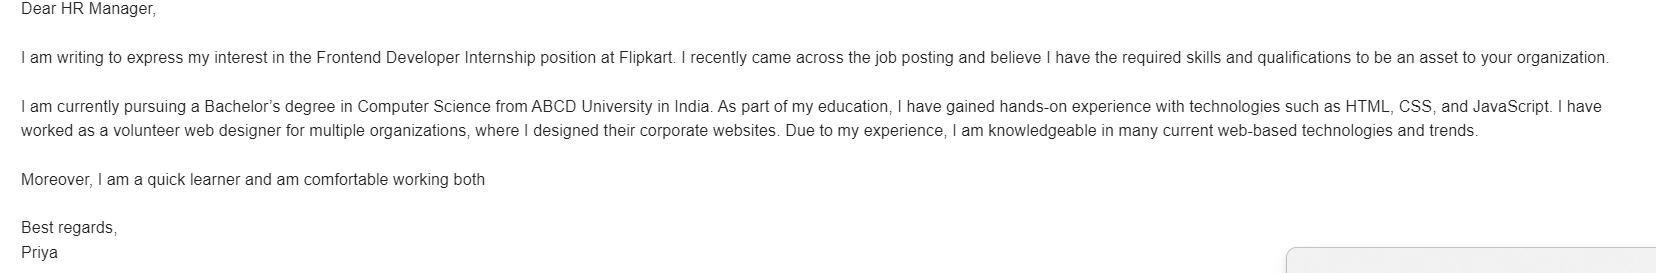